# Regression
Predict the final goals scored per each team.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display
from matplotlib import pyplot as plt

import numpy as np
import math

import pathlib
import shutil
import tempfile

## Data Preprocessing
    1. Normalization
    2. Data encoding: The goals [0,10] => [-1,1]. If Goal > 10 => 1

In [105]:
df02 = pd.read_csv('../data/data_regression_goals/sliding02_goals.csv', sep=',', index_col=0)

In [106]:
df02.head()

,home_team_goal,away_team_goal,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,2,1,3.50,3.30,2.10,1,3,6,11,16,137,67,117,53,8,2,0,15,6,161,78,72,30
1,2,2,2.50,3.30,2.88,3,1,6,8,16,134,64,151,77,3,3,4,11,18,104,44,87,36
2,1,2,1.91,3.40,4.20,4,2,4,10,15,120,58,124,56,2,2,6,11,15,134,59,100,46
3,2,1,3.25,3.25,2.30,5,2,3,22,12,177,82,74,37,6,3,1,19,8,169,95,113,58
4,3,0,1.20,6.00,19.00,7,2,1,15,8,161,72,74,31,3,2,5,10,17,143,69,134,69


In [107]:
def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['home_team_goal','away_team_goal']).values
    y = dataframe[['home_team_goal','away_team_goal']].values
    return X,y

In [108]:
def encode(i):
    # 1 be assigned as default value of passed argument (if goals > 10)
    return i

def decode(i):
    return i

In [109]:
def normalize(dataframe):
    column_names_to_not_normalize = ['home_team_goal','away_team_goal']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp
    
    dataframe['home_team_goal'] = dataframe.apply(lambda row: encode(row['home_team_goal']), axis=1)
    dataframe['away_team_goal'] = dataframe.apply(lambda row: encode(row['away_team_goal']), axis=1)
    
    return dataframe

In [110]:
n02 = normalize(df02)

train, test = train_test_split(n02, test_size=0.1, shuffle=False)
print(len(train), 'train examples')
print(len(test), 'test examples')


train_X,train_y = get_X_and_y(train)

test_X,test_y = get_X_and_y(test)

6329 train examples
704 test examples


In [128]:
n02.head()

,home_team_goal,away_team_goal,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,2.0,1.0,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039230,0.057061,0.488587,0.238944,0.417260,0.189015,0.028531,0.007133,0.000000,0.053495,0.021398,0.574178,0.278173,0.256775,0.106990
1,2.0,2.0,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059110,0.495044,0.236439,0.557848,0.284465,0.011083,0.011083,0.014777,0.040638,0.066498,0.384213,0.162552,0.321409,0.132997
2,1.0,2.0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451585,0.218266,0.466638,0.210740,0.007526,0.007526,0.022579,0.041395,0.056448,0.504270,0.222029,0.376321,0.173108
3,2.0,1.0,0.010289,0.010289,0.007281,0.015829,0.006332,0.009497,0.069647,0.037989,0.560339,0.259592,0.234266,0.117133,0.018995,0.009497,0.003166,0.060149,0.025326,0.535013,0.300747,0.357730,0.183614
4,3.0,0.0,0.004077,0.020384,0.064551,0.023782,0.006795,0.003397,0.050961,0.027179,0.546982,0.244613,0.251408,0.105320,0.010192,0.006795,0.016987,0.033974,0.057756,0.485829,0.234421,0.455252,0.234421


In [112]:
train, val = train_test_split(train, test_size=0.2)

In [160]:
#create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('home_team_goal')
  labels2 = dataframe.pop('away_team_goal')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [161]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(train, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [162]:
feature_columns = []
for header in ['odds-home', 'odds-draw', 'odds-away', 'home-draws', 'home-losses', 'home-goals','home-opposition-goals',
               'home-shots','home-shots_on_target','home-opposition_shots_on_target','home-wins','away-wins','away-draws','away-losses',
              'away-goals','away-opposition-goals','away-shots','away-shots_on_target','away-opposition_shots','away-opposition_shots_on_target']:
  feature_columns.append(feature_column.numeric_column(header))

In [163]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [180]:
batch_size = 128
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [194]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(11, activation='softmax')
])

In [195]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpointer = callbacks.ModelCheckpoint(filepath="resultsDN/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=False, monitor='val_acc',mode='max')
csv_logger = CSVLogger('resultsDN/trainanalysis1.csv',separator=',', append=False)


history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=200,
          callbacks=[checkpointer,csv_logger])

model.save("resultsDN/cnn_model.hdf5")

Train for 40 steps, validate for 10 steps
Epoch 1/200
34/40 [========================>.....] - ETA: 0s - loss: 1.8999 - accuracy: 0.3058   
Epoch 00001: saving model to resultsDN/checkpoint-01.hdf5
40/40 [==============================] - 1s 27ms/step - loss: 1.8589 - accuracy: 0.3061 - val_loss: 1.5908 - val_accuracy: 0.3152
Epoch 2/200
37/40 [==========================>...] - ETA: 0s - loss: 1.6003 - accuracy: 0.3182
Epoch 00002: saving model to resultsDN/checkpoint-02.hdf5
40/40 [==============================] - 0s 7ms/step - loss: 1.5988 - accuracy: 0.3184 - val_loss: 1.5686 - val_accuracy: 0.3152
Epoch 3/200
35/40 [=========================>....] - ETA: 0s - loss: 1.5766 - accuracy: 0.3232
Epoch 00003: saving model to resultsDN/checkpoint-03.hdf5
40/40 [==============================] - 0s 7ms/step - loss: 1.5790 - accuracy: 0.3227 - val_loss: 1.5542 - val_accuracy: 0.3136
Epoch 4/200
35/40 [=========================>....] - ETA: 0s - loss: 1.5560 - accuracy: 0.3241
Epoch 00004: 

Epoch 30/200
26/40 [==================>...........] - ETA: 0s - loss: 1.5207 - accuracy: 0.3438
Epoch 00030: saving model to resultsDN/checkpoint-30.hdf5
40/40 [==============================] - 0s 8ms/step - loss: 1.5156 - accuracy: 0.3421 - val_loss: 1.5252 - val_accuracy: 0.3420
Epoch 31/200
29/40 [====================>.........] - ETA: 0s - loss: 1.5197 - accuracy: 0.3246
Epoch 00031: saving model to resultsDN/checkpoint-31.hdf5
40/40 [==============================] - 0s 8ms/step - loss: 1.5186 - accuracy: 0.3356 - val_loss: 1.5280 - val_accuracy: 0.3262
Epoch 32/200
28/40 [====================>.........] - ETA: 0s - loss: 1.5202 - accuracy: 0.3382
Epoch 00032: saving model to resultsDN/checkpoint-32.hdf5
40/40 [==============================] - 0s 8ms/step - loss: 1.5157 - accuracy: 0.3348 - val_loss: 1.5224 - val_accuracy: 0.3412
Epoch 33/200
30/40 [=====================>........] - ETA: 0s - loss: 1.5132 - accuracy: 0.3409
Epoch 00033: saving model to resultsDN/checkpoint-33.hd

Epoch 59/200
26/40 [==================>...........] - ETA: 0s - loss: 1.4994 - accuracy: 0.3398
Epoch 00059: saving model to resultsDN/checkpoint-59.hdf5
40/40 [==============================] - 0s 9ms/step - loss: 1.5069 - accuracy: 0.3443 - val_loss: 1.5216 - val_accuracy: 0.3373
Epoch 60/200
36/40 [==========================>...] - ETA: 0s - loss: 1.5038 - accuracy: 0.3368
Epoch 00060: saving model to resultsDN/checkpoint-60.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.5041 - accuracy: 0.3348 - val_loss: 1.5251 - val_accuracy: 0.3444
Epoch 61/200
38/40 [===========================>..] - ETA: 0s - loss: 1.5109 - accuracy: 0.3347
Epoch 00061: saving model to resultsDN/checkpoint-61.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.5111 - accuracy: 0.3342 - val_loss: 1.5234 - val_accuracy: 0.3397
Epoch 62/200
36/40 [==========================>...] - ETA: 0s - loss: 1.5103 - accuracy: 0.3351
Epoch 00062: saving model to resultsDN/checkpoint-62.

Epoch 88/200
27/40 [===================>..........] - ETA: 0s - loss: 1.5028 - accuracy: 0.3420
Epoch 00088: saving model to resultsDN/checkpoint-88.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4981 - accuracy: 0.3456 - val_loss: 1.5283 - val_accuracy: 0.3412
Epoch 89/200
36/40 [==========================>...] - ETA: 0s - loss: 1.4962 - accuracy: 0.3353
Epoch 00089: saving model to resultsDN/checkpoint-89.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.5040 - accuracy: 0.3370 - val_loss: 1.5274 - val_accuracy: 0.3483
Epoch 90/200
38/40 [===========================>..] - ETA: 0s - loss: 1.5008 - accuracy: 0.3396
Epoch 00090: saving model to resultsDN/checkpoint-90.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.5009 - accuracy: 0.3397 - val_loss: 1.5305 - val_accuracy: 0.3404
Epoch 91/200
38/40 [===========================>..] - ETA: 0s - loss: 1.5045 - accuracy: 0.3376
Epoch 00091: saving model to resultsDN/checkpoint-91

Epoch 117/200
34/40 [========================>.....] - ETA: 0s - loss: 1.4859 - accuracy: 0.3454
Epoch 00117: saving model to resultsDN/checkpoint-117.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 1.4919 - accuracy: 0.3443 - val_loss: 1.5403 - val_accuracy: 0.3365
Epoch 118/200
34/40 [========================>.....] - ETA: 0s - loss: 1.4958 - accuracy: 0.3348
Epoch 00118: saving model to resultsDN/checkpoint-118.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 1.4975 - accuracy: 0.3346 - val_loss: 1.5302 - val_accuracy: 0.3428
Epoch 119/200
33/40 [=======================>......] - ETA: 0s - loss: 1.4988 - accuracy: 0.3371
Epoch 00119: saving model to resultsDN/checkpoint-119.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 1.4948 - accuracy: 0.3431 - val_loss: 1.5355 - val_accuracy: 0.3357
Epoch 120/200
38/40 [===========================>..] - ETA: 0s - loss: 1.4943 - accuracy: 0.3433
Epoch 00120: saving model to resultsDN/checkp

Epoch 146/200
36/40 [==========================>...] - ETA: 0s - loss: 1.4970 - accuracy: 0.3507
Epoch 00146: saving model to resultsDN/checkpoint-146.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4889 - accuracy: 0.3510 - val_loss: 1.5413 - val_accuracy: 0.3325
Epoch 147/200
37/40 [==========================>...] - ETA: 0s - loss: 1.4812 - accuracy: 0.3522
Epoch 00147: saving model to resultsDN/checkpoint-147.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4860 - accuracy: 0.3526 - val_loss: 1.5490 - val_accuracy: 0.3096
Epoch 148/200
33/40 [=======================>......] - ETA: 0s - loss: 1.4839 - accuracy: 0.3539
Epoch 00148: saving model to resultsDN/checkpoint-148.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4885 - accuracy: 0.3484 - val_loss: 1.5336 - val_accuracy: 0.3294
Epoch 149/200
34/40 [========================>.....] - ETA: 0s - loss: 1.4865 - accuracy: 0.3454
Epoch 00149: saving model to resultsDN/checkp

Epoch 175/200
27/40 [===================>..........] - ETA: 0s - loss: 1.4604 - accuracy: 0.3672
Epoch 00175: saving model to resultsDN/checkpoint-175.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4731 - accuracy: 0.3567 - val_loss: 1.5548 - val_accuracy: 0.3120
Epoch 176/200
38/40 [===========================>..] - ETA: 0s - loss: 1.4780 - accuracy: 0.3544
Epoch 00176: saving model to resultsDN/checkpoint-176.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4744 - accuracy: 0.3549 - val_loss: 1.5459 - val_accuracy: 0.3207
Epoch 177/200
39/40 [============================>.] - ETA: 0s - loss: 1.4753 - accuracy: 0.3580
Epoch 00177: saving model to resultsDN/checkpoint-177.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.4761 - accuracy: 0.3581 - val_loss: 1.5438 - val_accuracy: 0.3246
Epoch 178/200
39/40 [============================>.] - ETA: 0s - loss: 1.4754 - accuracy: 0.3540
Epoch 00178: saving model to resultsDN/checkp

In [196]:
model.load_weights("resultsDN/checkpoint-20.hdf5")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [197]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

6/6 [==============================] - 0s 42ms/step - loss: 1.5475 - accuracy: 0.3153
Accuracy 0.3153409


In [198]:
model.predict(test_ds)

array([[5.23942746e-02, 1.14583425e-01, 2.41722003e-01, ...,
        9.82063077e-03, 6.75166026e-03, 1.43568905e-03],
       [1.65579274e-01, 2.95866460e-01, 2.93695837e-01, ...,
        7.97377608e-04, 2.52638827e-04, 8.85360932e-05],
       [3.90486151e-01, 3.38443190e-01, 1.96990490e-01, ...,
        5.56133818e-05, 1.43173511e-05, 7.44066119e-06],
       ...,
       [1.62363678e-01, 3.02654237e-01, 3.00801873e-01, ...,
        6.14263990e-04, 1.86523772e-04, 6.23150045e-05],
       [1.29795209e-01, 2.63981700e-01, 3.01274806e-01, ...,
        1.36732124e-03, 4.89077589e-04, 1.58548151e-04],
       [1.77323982e-01, 2.90549099e-01, 2.86106139e-01, ...,
        1.16129173e-03, 4.08191292e-04, 1.60566880e-04]], dtype=float32)

In [199]:
y_pred = model.predict(test_ds)
#accuracy = accuracy_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred , average="weighted")
#precision = precision_score(y_test, y_pred , average="weighted")
#f1 = f1_score(y_test, y_pred, average="weighted")
#np.savetxt('resultsDN/expected1.txt', y_test, fmt='%01d')
np.savetxt('resultsDN/predicted1.txt', y_pred, fmt='%01d')

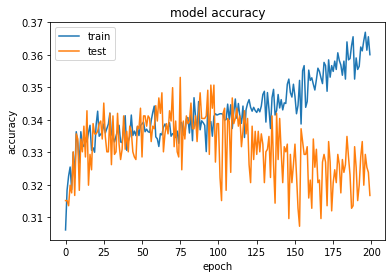

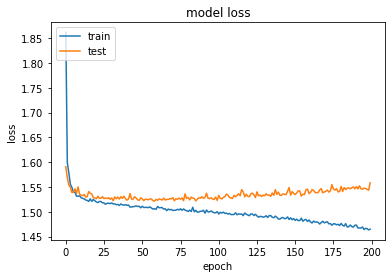

In [200]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()